In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

### Read Data

In [3]:
# Read data
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data.read_data import load_and_label_raw_data
data_path = "../data/raw/german/german.data"
df = load_and_label_raw_data(data_path)

# map readable labels for categorical features
from src.data.read_data import replace_categorical_labels
numeric_features = [
    'duration_mon', 'credit_amount', 'installment_rate', 
    'residence_since', 'age', 'existing_credits', 'num_liable_people'
]

categorical_features = [
    'account_status', 'credit_history', 'purpose', 'savings', 'employment_yr',
    'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
    'housing', 'job', 'telephone', 'foreign_worker'
]

df_label = replace_categorical_labels(df, numeric_features)
df_label.head()

,duration_mon,credit_amount,installment_rate,residence_since,age,existing_credits,num_liable_people,account_status,credit_history,purpose,...,employment_yr,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker,target
0,6,1169,4,4,67,2,1,< 0 DM,critical account,radio/TV,...,>= 7 years,male-single,none,real estate,none,own,skilled,yes,yes,1
1,48,5951,2,2,22,1,1,0 <= ... < 200 DM,existing credits paid,radio/TV,...,1-4 years,female-married,none,real estate,none,own,skilled,none,yes,0
2,12,2096,2,3,49,1,2,no checking account,critical account,education,...,4-7 years,male-single,none,real estate,none,own,unskilled-resident,none,yes,1
3,42,7882,2,4,45,1,2,< 0 DM,existing credits paid,furniture,...,4-7 years,male-single,guarantor,life insurance,none,for free,skilled,none,yes,1
4,24,4870,3,4,53,2,2,< 0 DM,delayed payments,car (new),...,1-4 years,male-single,none,unknown,none,for free,skilled,none,yes,0


In [4]:
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   duration_mon             1000 non-null   int64 
 1   credit_amount            1000 non-null   int64 
 2   installment_rate         1000 non-null   int64 
 3   residence_since          1000 non-null   int64 
 4   age                      1000 non-null   int64 
 5   existing_credits         1000 non-null   int64 
 6   num_liable_people        1000 non-null   int64 
 7   account_status           1000 non-null   object
 8   credit_history           1000 non-null   object
 9   purpose                  1000 non-null   object
 10  savings                  1000 non-null   object
 11  employment_yr            1000 non-null   object
 12  personal_status_sex      1000 non-null   object
 13  other_debtors            1000 non-null   object
 14  property                 1000 non-null   

In [5]:
df_label.nunique()

duration_mon                33
credit_amount              921
installment_rate             4
residence_since              4
age                         53
existing_credits             4
num_liable_people            2
account_status               4
credit_history               5
purpose                     10
savings                      5
employment_yr                5
personal_status_sex          4
other_debtors                3
property                     4
other_installment_plans      3
housing                      3
job                          4
telephone                    2
foreign_worker               2
target                       2
dtype: int64

In [6]:
df_label.describe()

,duration_mon,credit_amount,installment_rate,residence_since,age,existing_credits,num_liable_people,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [7]:
df_label['target'].value_counts(normalize=True)

target
1    0.7
0    0.3
Name: proportion, dtype: float64

Based on previous information, the data has no missing value, with 7 numeric features and 13 categorical features. 

### Initial EDA

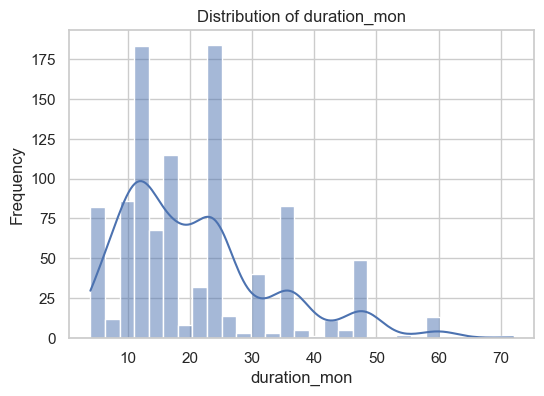

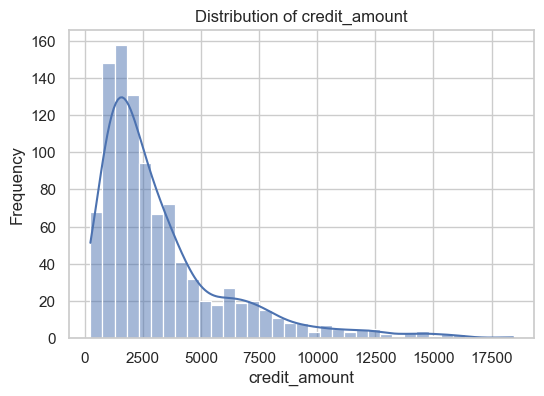

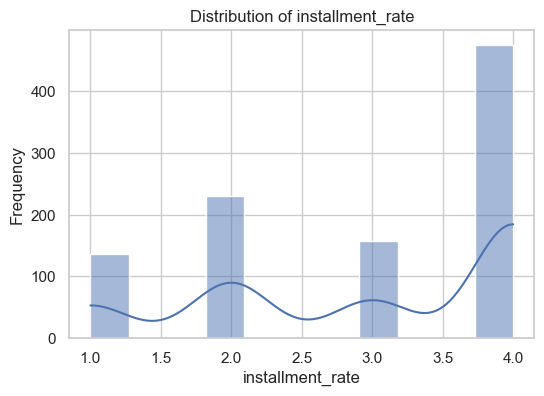

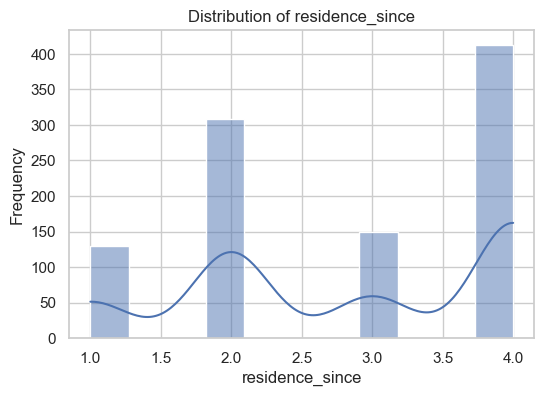

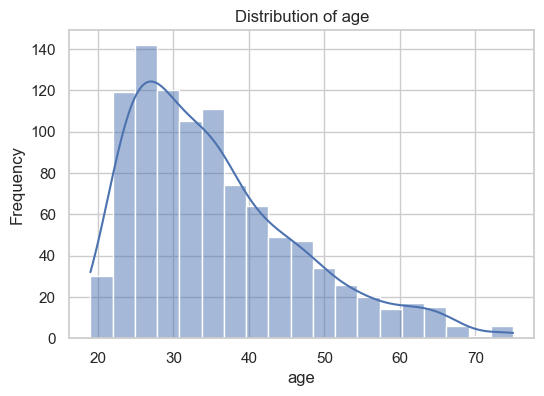

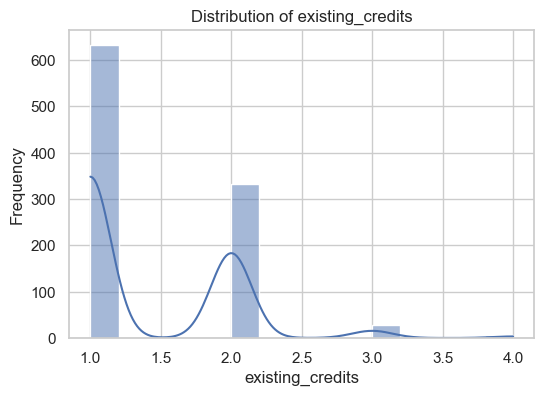

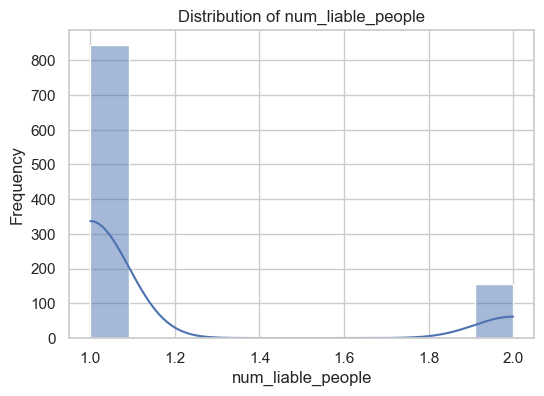

In [8]:
sns.set(style="whitegrid")

# Start to take a look into the data distribution
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df_label[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Based on the initial EDA results, we observe the following patterns among the numerical features:
- `duration_mon` ranges from 4 to 72 months, with the majority of loans having a duration shorter than 24 months. This reflects a preference for short-term to mid-term loans.
- `credit_amount` displays a strong right-skewed distribution, with most loan amounts concentrated below 5,000. This aligns with typical banking behavior, where large loans are usually rare.
- `installment_rate` has only four discrete values (1–4), with a notable concentration at value 4, suggesting that many clients allocate a relatively high proportion of their disposable income toward loan installments.
- `residence_since` also shows discrete values from 1 to 4 years, and most clients have been living at their current address for 4 years, indicating strong residential stability.
- `age` is moderately right-skewed, with most clients younger than 30. This aligns with bank lending practices that target young borrowers with earning potential. 
- `existing_credits` is heavily concentrated at 1 and 2, suggesting most clients have minimal prior credit exposure at this bank.
- `num_liable_people` is highly imbalanced: over 85% of clients report only 1 dependent. This suggests low household financial burden for the majority.

Other than these, it is noticable that `residence_since`, `installment_rate` and `existing_credits` are not truly continuous variables. Their distributions indicate they are ordinal categorical features with 4 levels. `num_liable_people` are also low-cardinality integers with clear a peak at 1. 

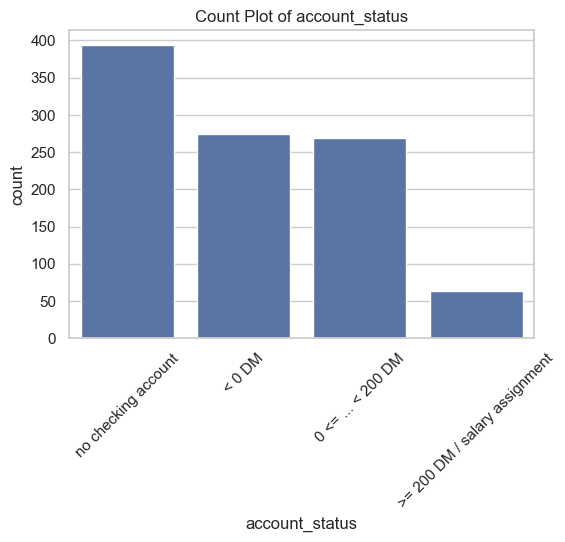

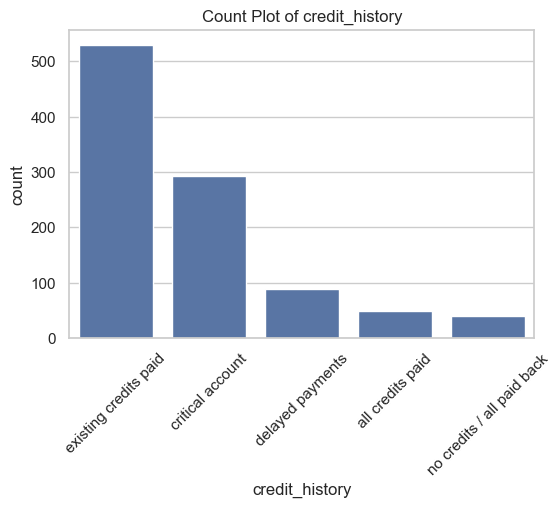

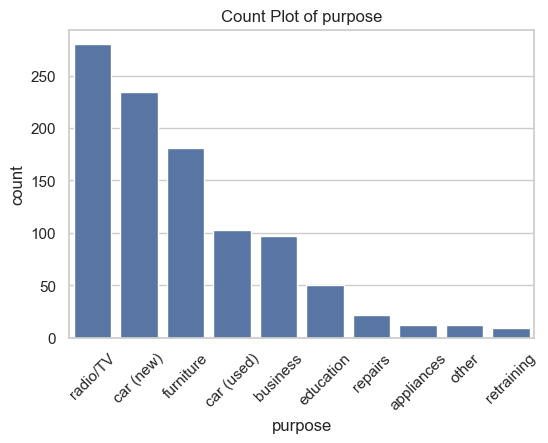

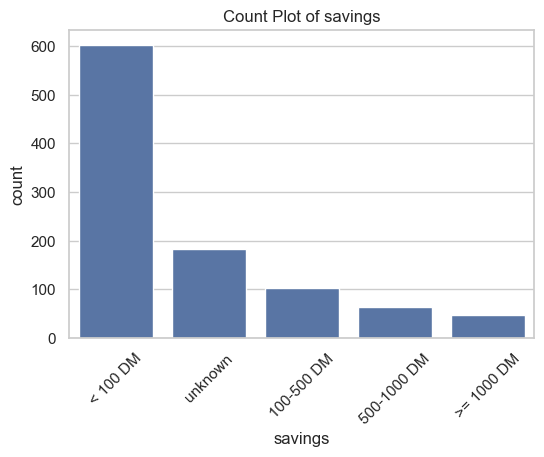

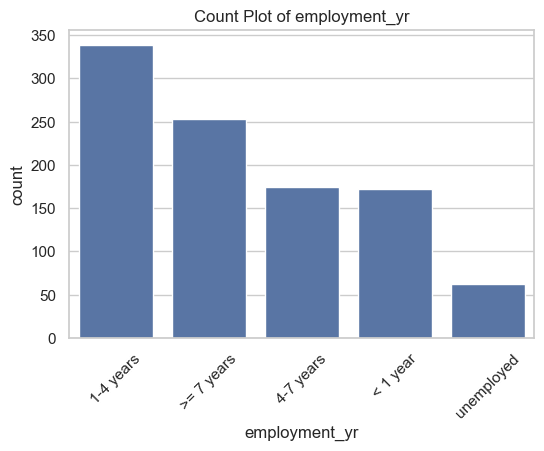

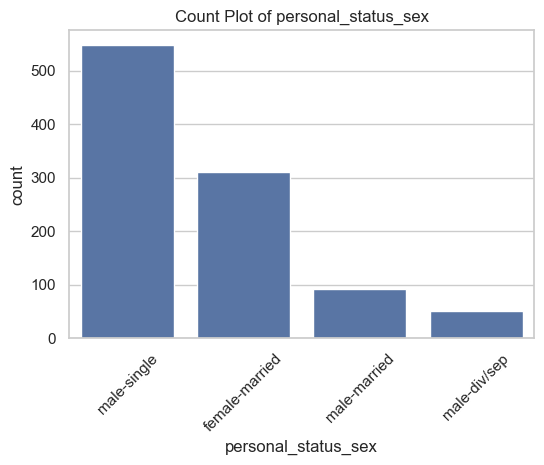

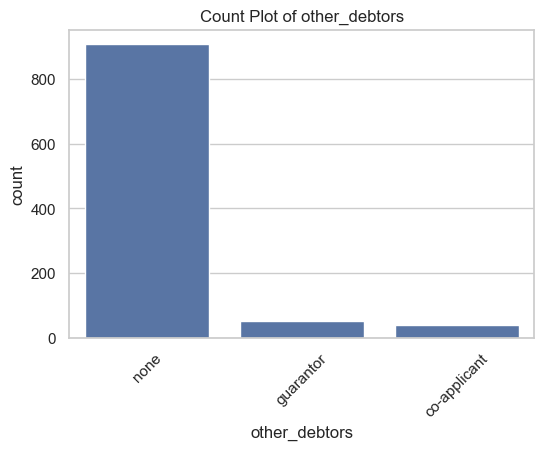

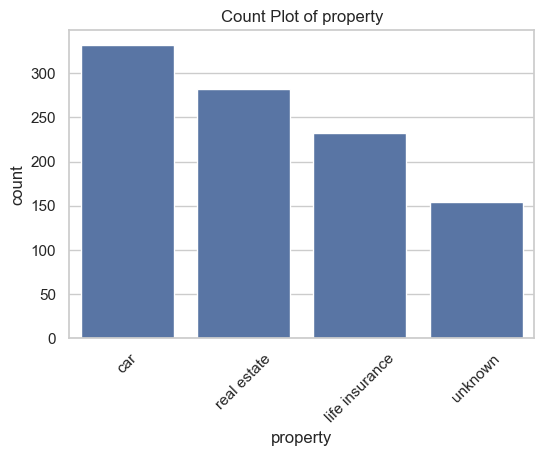

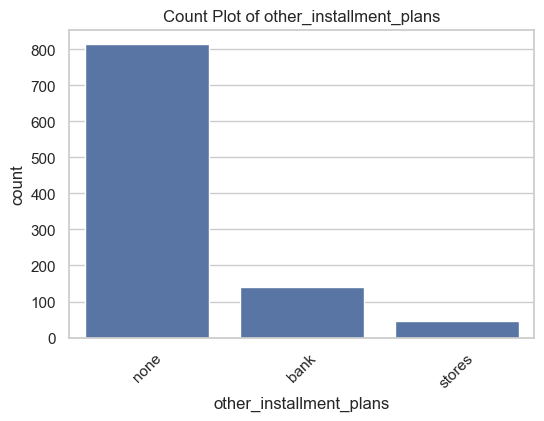

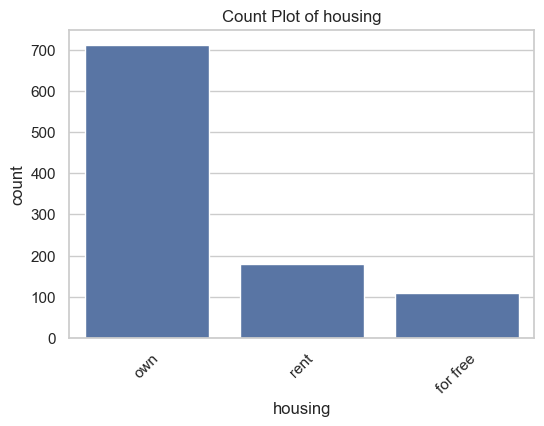

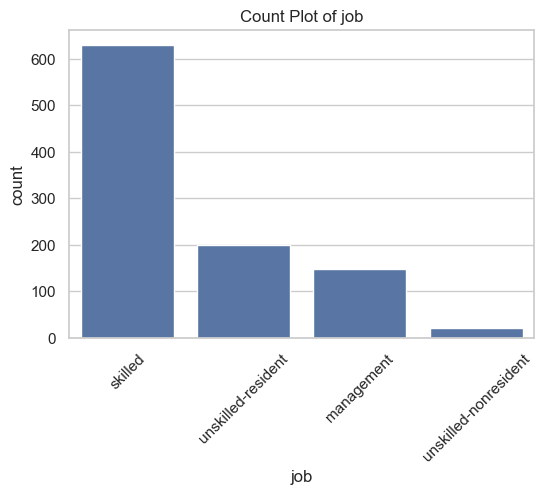

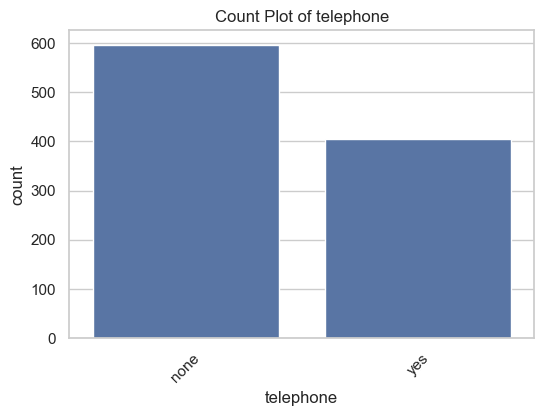

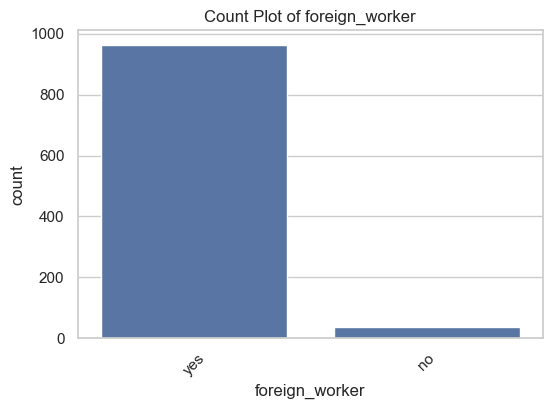

In [9]:
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_label, order=df_label[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

The initial EDA of categorical features deliver that most applicants have no checking account, and a relatively smaller group has consistent salary assignments with ≥ 200 DM. In terms of credit history, the majority have existing credits paid on time, while a smaller portion shows critical accounts or past payment delays. Loan purposes are primarily for radio/TV, new cars, and furniture. Over 60% of applicants have savings below 100 DM or none, indicating limited financial reserves. Most are employed for 1–4 years, with fewer unemployed. The majority are single males or married females. Nearly all applicants report no other debtors or guarantors. Property ownership is mostly a car, followed by real estate. Most applicants have no other installment plans, and housing is primarily owned. Skilled jobs dominate, while telephone access is common but not universal. Finally, the vast majority are foreign workers.

#### Target feature EDA

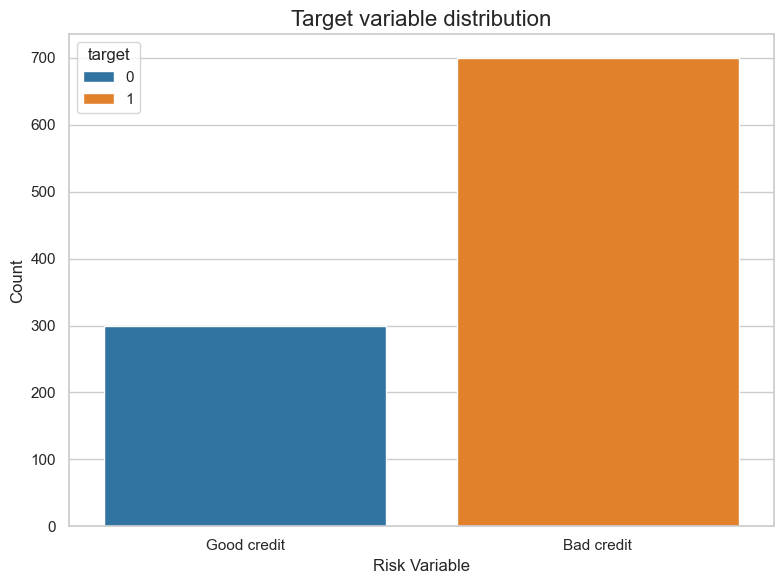

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df_label, hue='target', palette={0: '#1f77b4', 1: '#ff7f0e'})
ax.set_xticks([0, 1])
ax.set_xticklabels(['Good credit', 'Bad credit'])
plt.title("Target variable distribution", fontsize=16)
plt.xlabel("Risk Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

The result shows that in this dataset, most of the data are bad credits. 

Next, let's cross check the target feature distribution with categorical feature. 

In [11]:
def plot_categoricals_vs_target_split(df, categorical_cols, target_col='target', n_cols=3):
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.5 * n_rows))
    axes = axes.flatten()

    for i, cat_col in enumerate(categorical_cols):
        ax = axes[i]
        sns.countplot(data=df, x=cat_col, hue=target_col, dodge=True, palette=['#4c72b0', '#dd8452'], ax=ax)
        ax.set_title(f'{cat_col} vs {target_col}', fontsize=11)
        ax.set_xlabel(cat_col, fontsize=10)
        ax.set_ylabel("Count", fontsize=10)
        ax.tick_params(axis='x', rotation=30)
        ax.legend(title='Target', labels=['Good credit', 'Bad credit'], fontsize=8, title_fontsize=9)

    # remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

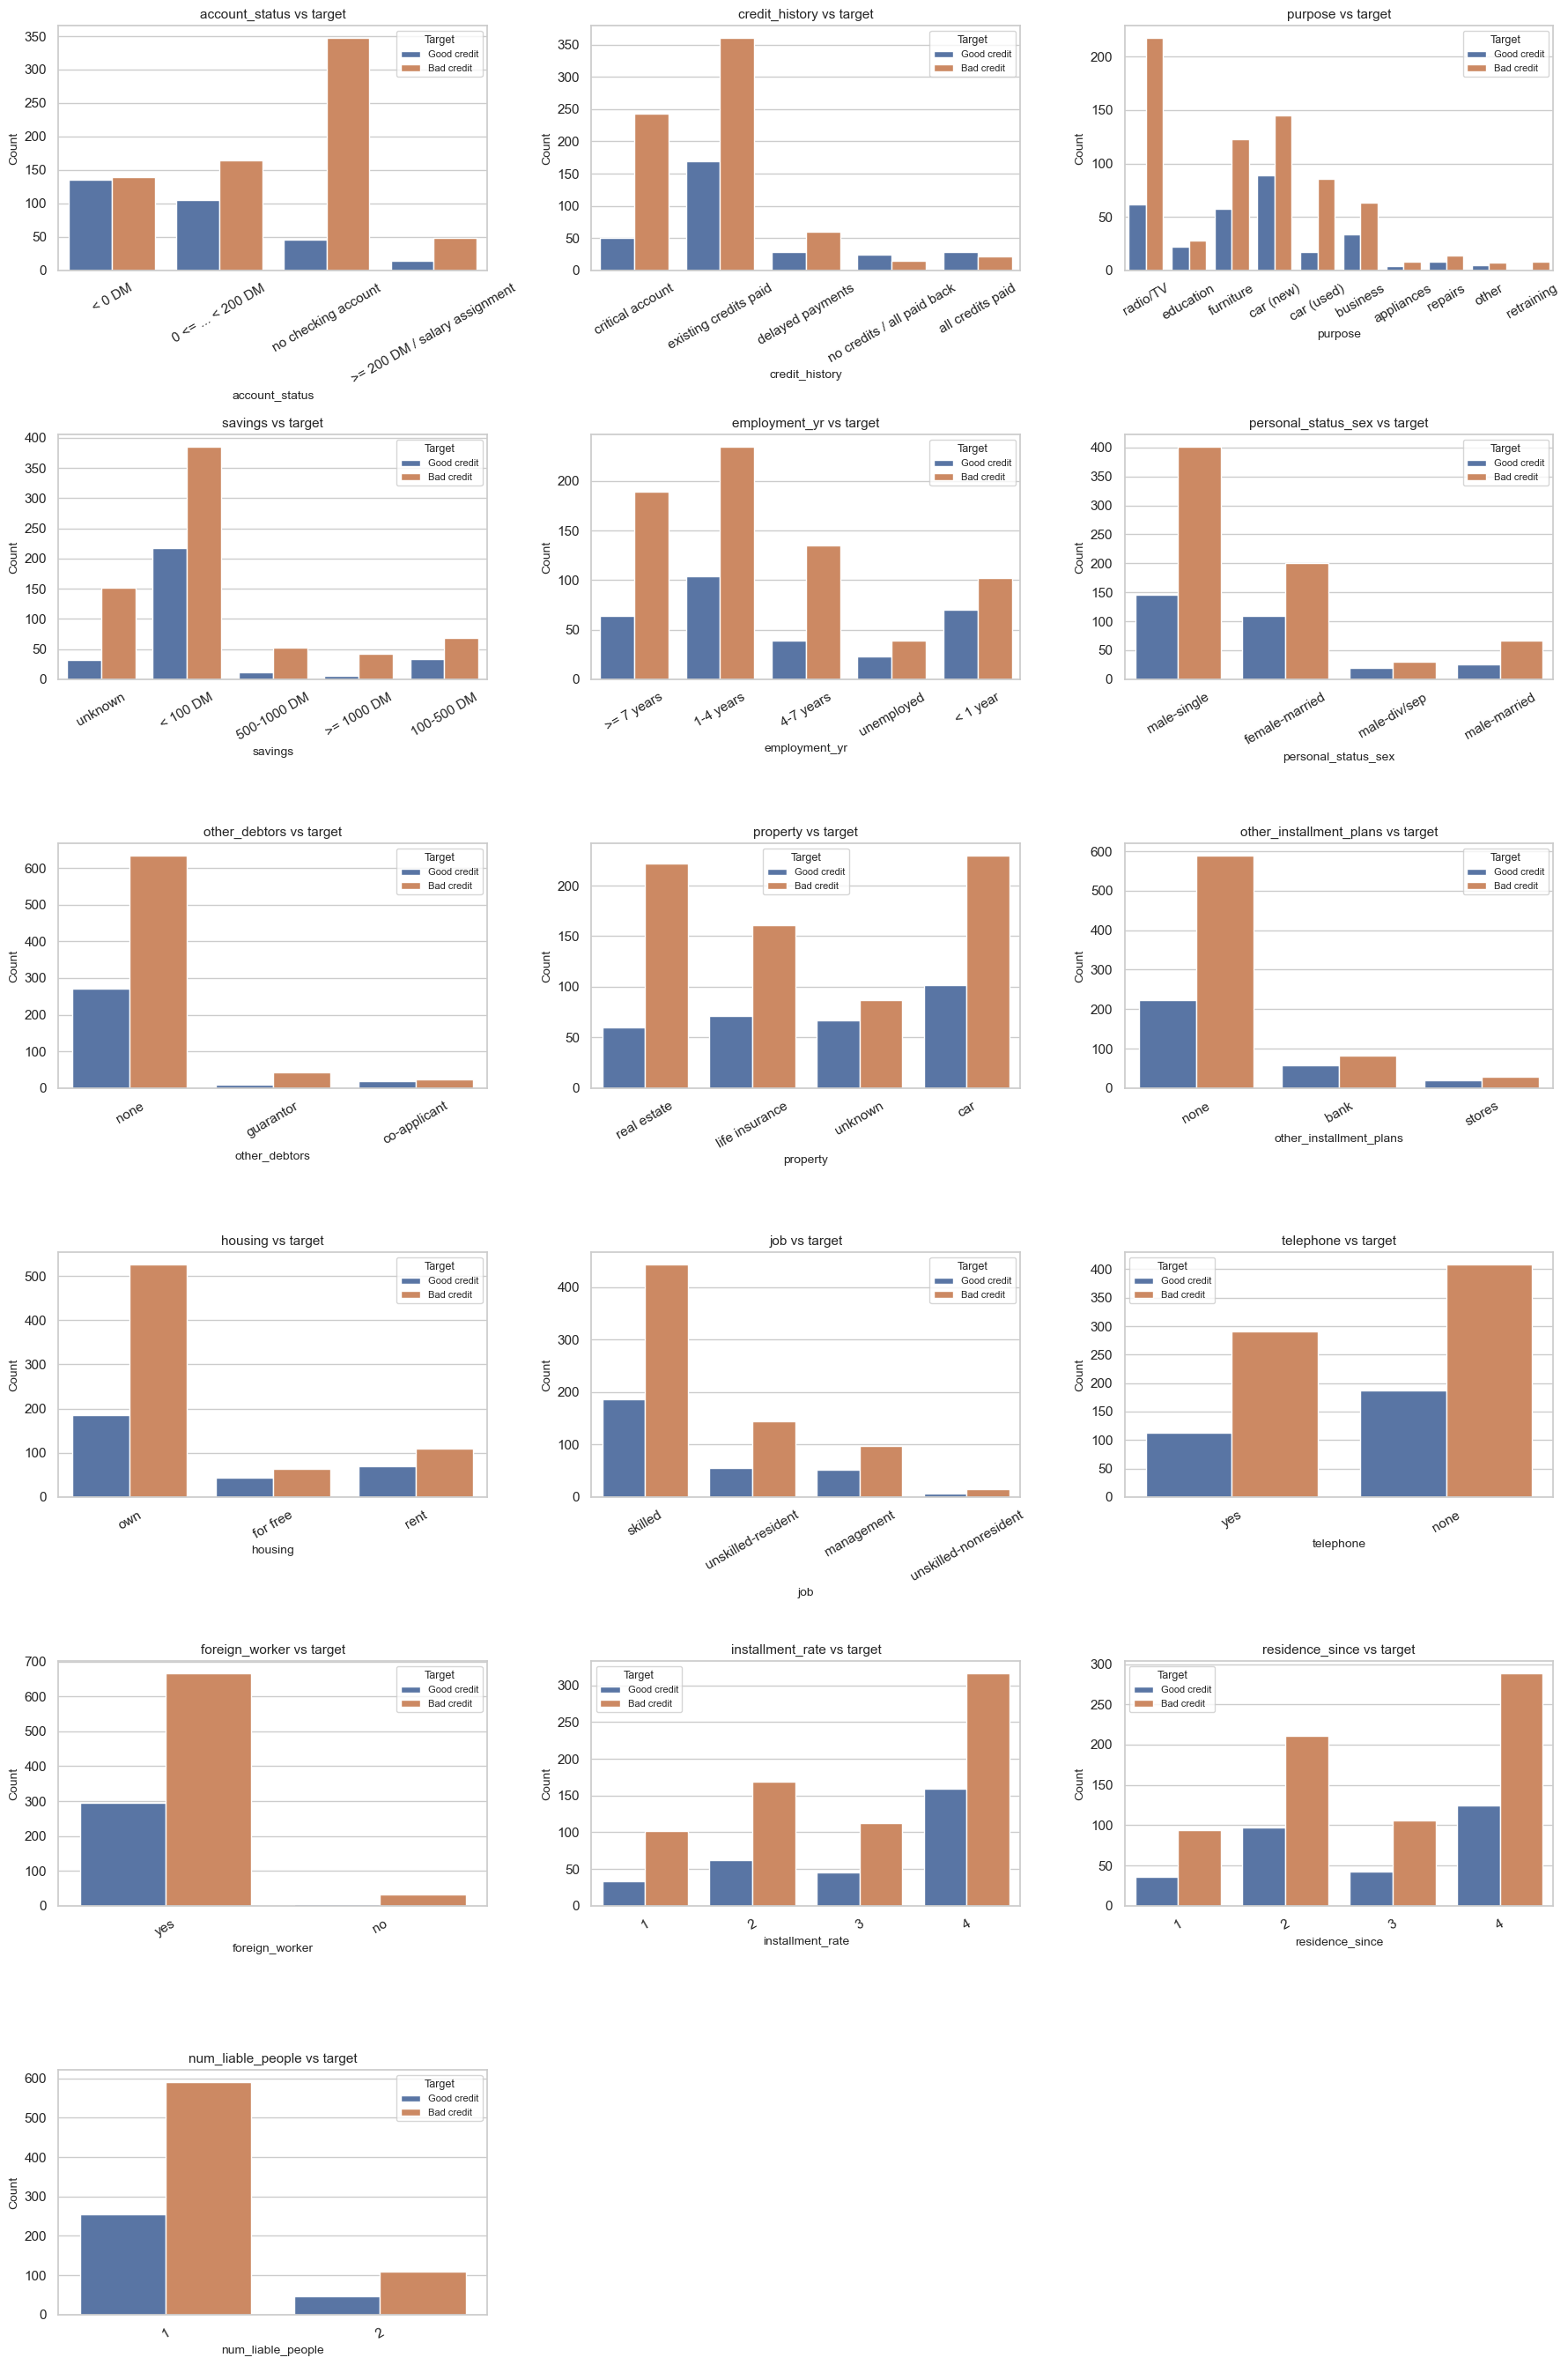

In [12]:
categorical_features = [
    'account_status', 'credit_history', 'purpose', 'savings', 'employment_yr',
    'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
    'housing', 'job', 'telephone', 'foreign_worker', 'installment_rate', 
    'residence_since', 'num_liable_people'
]
fig = plot_categoricals_vs_target_split(df_label, categorical_features)

For most of the features, the majority of loans are bad credit, which align with reality. 

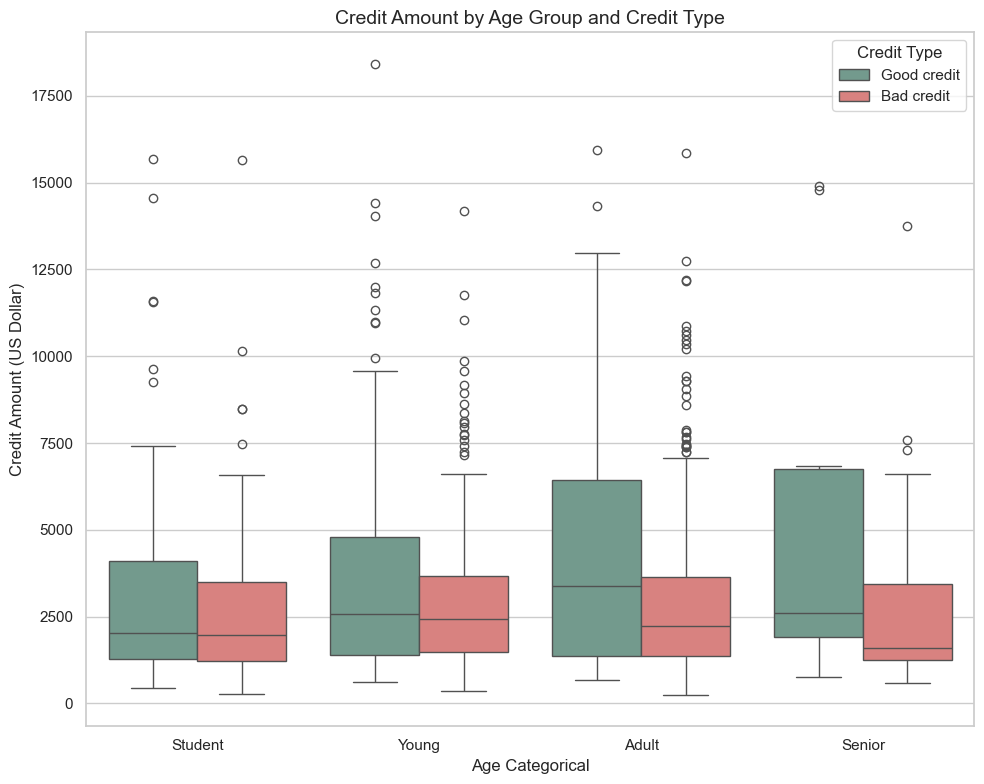

In [13]:
# EDA of target feature and age
plt.figure(figsize=(10, 8))
bins = [18, 25, 35, 60, 100]
labels = ['Student', 'Young', 'Adult', 'Senior']
df_label['age_group'] = pd.cut(df_label['age'], bins=bins, labels=labels, right=False)

ax = sns.boxplot(
    x='age_group', 
    y='credit_amount', 
    hue='target', 
    data=df_label,
    palette={0: '#6CA18F', 1: '#E77471'} 
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Good credit', 'Bad credit'], title='Credit Type')

plt.xlabel("Age Categorical", fontsize=12)
plt.ylabel("Credit Amount (US Dollar)", fontsize=12)
plt.title("Credit Amount by Age Group and Credit Type", fontsize=14)
plt.tight_layout()
plt.show()